In [2]:
import os
import pandas as pd
import csv

In [3]:
source_directory = "../data/csvs/"

def get_concatenated_df(source_folder="../data/csvs/",destination_path='',file_year='RC_2016'):
    '''
    Returns concatenated dataframe from multiple files in source_folder. Note: all files should be in csv.  
    If destination_path is defined it saves in the destination as csv else returns concatenated dataframe.
    '''
    files = [i for i in os.listdir(source_folder) if i.endswith('.csv') and i.startswith(file_year)]
    dfList = []
    for k,file in enumerate(files):
        df = pd.read_csv(source_folder+file, header=0, low_memory=False,error_bad_lines=False)
        dfList.append(df)
        print('{}->{}'.format(k,file))
    concatdf = pd.concat(dfList,axis=0, ignore_index=True,sort=False)
    if(destination_path!=''):
        print('null')
        concatdf.to_csv(dest,index=None)
    return concatdf

df_2016 = get_concatenated_df(file_year='RC_2016')       
#df = pd.read_csv(source_directory+'RC_2015-01.csv', header=0, low_memory=False,error_bad_lines=False)


0->RC_2016-01.csv
1->RC_2016-02.csv
2->RC_2016-03.csv
3->RC_2016-04.csv
4->RC_2016-05.csv
5->RC_2016-06.csv
6->RC_2016-07.csv
7->RC_2016-08.csv
8->RC_2016-09.csv
9->RC_2016-10.csv
10->RC_2016-11.csv


In [4]:
df = df_2016.sort_values(by=['link_id'])
#df.to_csv("../tree_structure_2016.csv",columns=['link_id','subreddit','id','parent_id','author','created_utc','ups'],index=False)
#df_per_post.to_csv(source_directory+'../stats_per_post_2016.csv',index=False)

In [5]:
# Per author information
df_per_author = pd.DataFrame()
df_by_author = df_2016.groupby(['author'])
df_per_author['tree_involved'] = df_by_author['link_id'].nunique()
df_per_author['tree_ids'] = df_by_author['link_id'].apply(lambda x: str(set(x)))
df_per_author['subreddit_involved'] = df_by_author['subreddit'].nunique()
df_per_author['subreddit_marvel'] = df_by_author['subreddit'].apply(lambda x: len([i for i in set(x) if ('marvel' in i.lower() or 'avenger' in i.lower())]))
df_per_author['subreddit_starwars'] = df_by_author['subreddit'].apply(lambda x: len([i for i in set(x) if ('starwars' in i.lower() or 'jedi' in i.lower())]))
df_per_author['scores'] = df_by_author['ups'].sum()
# removing the deleted authors
df_per_author = df_per_author.drop(["[deleted]"]) 
#df_per_author['author'] = df_per_author.index
df_per_author.to_csv('../data/authors_2016.csv')

In [6]:
df_per_author.head(10)

tree_involved  \
author                                
---JD---                          3   
---Kevin---                       1   
---TheFierceDeity---             17   
---jaguar---                      2   
---lll---                         1   
---reddit_account---              6   
--BONE--                          2   
--Butts--                         1   
--Edog--                          1   
--MrFantastik--                   1   

                                                               tree_ids  \
author                                                                    
---JD---                        {'t3_41syym', 't3_423usp', 't3_43cu14'}   
---Kevin---                                               {'t3_43181i'}   
---TheFierceDeity---  {'t3_44ac3g', 't3_41lcap', 't3_41jeth', 't3_41...   
---jaguar---                                 {'t3_43bvqs', 't3_4iypeg'}   
---lll---                                                 {'t3_4lyl0d'}   
---reddit_account---  {'t3_4rifr3', 't3_4rhkbl', 't3_4tx65h', 't3_55...   
--BONE--                                     {'t3_50nqvy', 't3_4kjojz'}   
--Butts--                                                 {'t3_45zrbk'}   
--Edog--                                                  {'t3_420o3o'}   
--MrFantastik--                                           {'t3_4k83fv'}   

                      subreddit_involved  subreddit_marvel  \
author                                                       
---JD---                               1                 0   
---Kevin---                            1                 0   
---TheFierceDeity---                   1                 0   
---jaguar---                           1                 1   
---lll---                              1                 0   
---reddit_account---                   1                 1   
--BONE--                               1                 0   
--Butts--                              1                 0   
--Edog--                               1                 0   
--MrFantastik--                        1                 0   

                      subreddit_starwars  scores  
author                                            
---JD---                               1     4.0  
---Kevin---                            1    18.0  
---TheFierceDeity---                   1    55.0  
---jaguar---                           0    11.0  
---lll---                              1     1.0  
---reddit_account---                   0     4.0  
--BONE--                               1     8.0  
--Butts--                              1    16.0  
--Edog--                               1    11.0  
--MrFantastik--                        1     2.0

In [7]:
df_per_author.describe()

tree_involved  subreddit_involved  subreddit_marvel  \
count  193711.000000       193711.000000     193711.000000   
mean       10.226337            1.301454          0.476968   
std        52.345292            0.720596          0.659659   
min         1.000000            1.000000          0.000000   
25%         1.000000            1.000000          0.000000   
50%         2.000000            1.000000          0.000000   
75%         5.000000            1.000000          1.000000   
max      6869.000000           26.000000          8.000000   

       subreddit_starwars         scores  
count       193711.000000  193711.000000  
mean             0.824486      86.926519  
std              0.725509     499.526203  
min              0.000000   -1194.000000  
25%              0.000000       1.000000  
50%              1.000000       5.000000  
75%              1.000000      30.000000  
max             19.000000   33040.000000

### For authors based on their involvement, we plot the following:

* Based on top scoring authors we plot their involvement in different trees. 
* Tree involment vs subreddit involvement
* tree involvement vs subreddit category
* score vs subreddit category

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

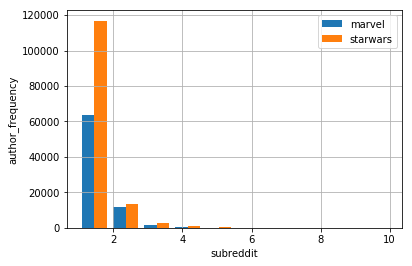

In [77]:
plt.hist([df_per_author['subreddit_marvel'],df_per_author['subreddit_starwars']],range=(1,10),label=['marvel','starwars'],histtype='bar')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('subreddit')
plt.ylabel('author_frequency')
plt.savefig('../data/plots/author_histogram.jpg',dpi=300)

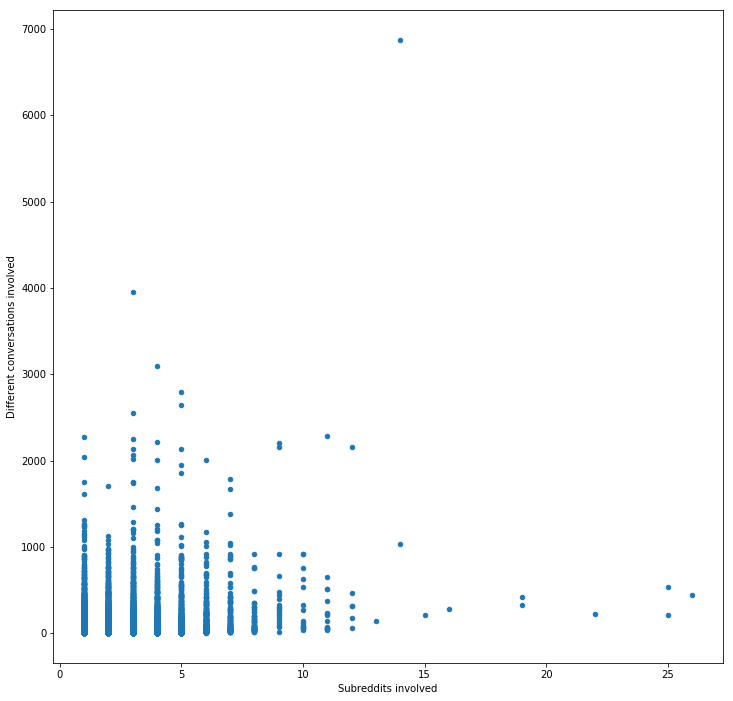

In [75]:
#plt.plot(df_per_author['tree_involved'],df_per_author['subreddit_involved'], color='blue')
scatter = df_per_author.plot(x='subreddit_involved',y='tree_involved',kind='scatter',figsize=(12,12))
plt.xlabel("Subreddits involved")
plt.ylabel("Different conversations involved")
scatter.figure.savefig('../data/plots/conversations_vs_subreddit.jpg')

* Subreddits have a low range (1-26), indicating that there are no authors going beyond 26 subreddits
* Very few authors comment widely, i.e. an author who prefers commenting on more and more subreddits are usually not involved in larger discussions. They tend to keep it short. 
* As expected, authors who involve in larger conversations comment on a short range of subreddit categories. 

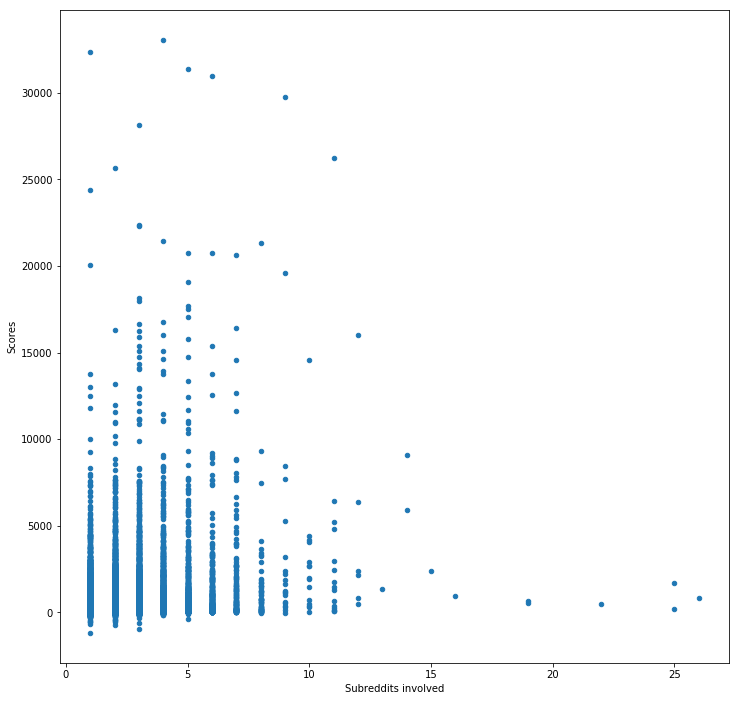

In [82]:
#plt.plot(df_per_author['tree_involved'],df_per_author['subreddit_involved'], color='blue')
scatter = df_per_author.plot(x='subreddit_involved',y='scores',kind='scatter',figsize=(12,12))
plt.xlabel("Subreddits involved")
plt.ylabel("Scores")
scatter.figure.savefig('../data/plots/score_vs_subreddit.jpg')

* Highly scoring authors comment on less number of subreddits
* Those who comment on broad category of subreddits do not receive a lot of upvotes. 